In [3]:
from docx import Document
import random

keywords = ["course outcomes", "experiment"]

def create_docx(filename, keywords):
    doc = Document()
    for keyword in keywords:
        freq = random.randint(1, 10)  # Random frequency between 1 and 10
        doc.add_paragraph(f"{keyword}: {freq}")
    doc.save(filename)

# Generate 6 sample documents
for i in range(1, 7):
    create_docx(f"doc_{i}.docx", keywords)

In [4]:
from docx import Document
import pandas as pd

def extract_keyword_frequencies(filename):
    doc = Document(filename)
    freq_dict = {}
    for para in doc.paragraphs:
        if ":" in para.text:
            keyword, freq = para.text.split(":")
            freq_dict[keyword.strip()] = int(freq.strip())
    return freq_dict

# Create DataFrame of frequencies
docs = []
for i in range(1, 7):
    doc_data = extract_keyword_frequencies(f"doc_{i}.docx")
    docs.append(doc_data)

df = pd.DataFrame(docs).fillna(0)  # Fill missing keywords with 0
print(df)

   course outcomes  experiment
0                7           9
1                8          10
2                3           1
3                3           6
4                6           8
5                7           6


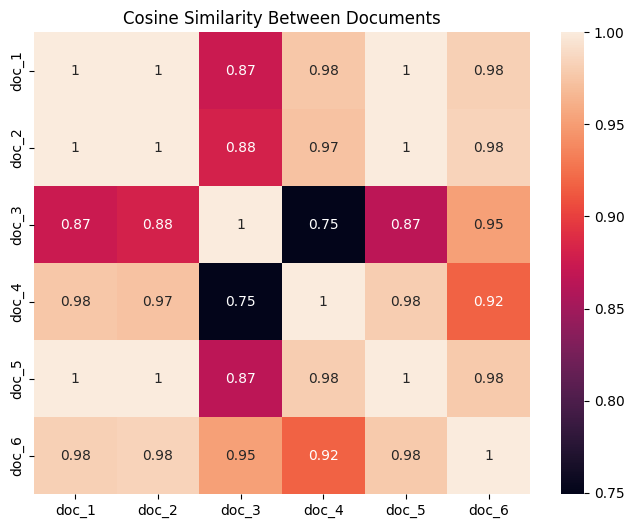

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity# Convert frequency table into "documents" (each row = document's keyword frequencies as text)
docs_text = []
for _, row in df.iterrows():
    doc_text = " ".join([f"{word} " * int(row[word]) for word in keywords])
    docs_text.append(doc_text)

# Compute TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs_text)

# Compute Cosine Similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim, annot=True, xticklabels=[f"doc_{i}" for i in range(1, 7)], yticklabels=[f"doc_{i}" for i in range(1, 7)])
plt.title("Cosine Similarity Between Documents")
plt.show()